<a href="https://colab.research.google.com/github/rokosu/AI-driven-behavioural-/blob/main/Part_II_20_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2.1 The 0–5 Scoring Methodology
Our scoring system aligns with international standards while remaining adaptable to regional contexts:

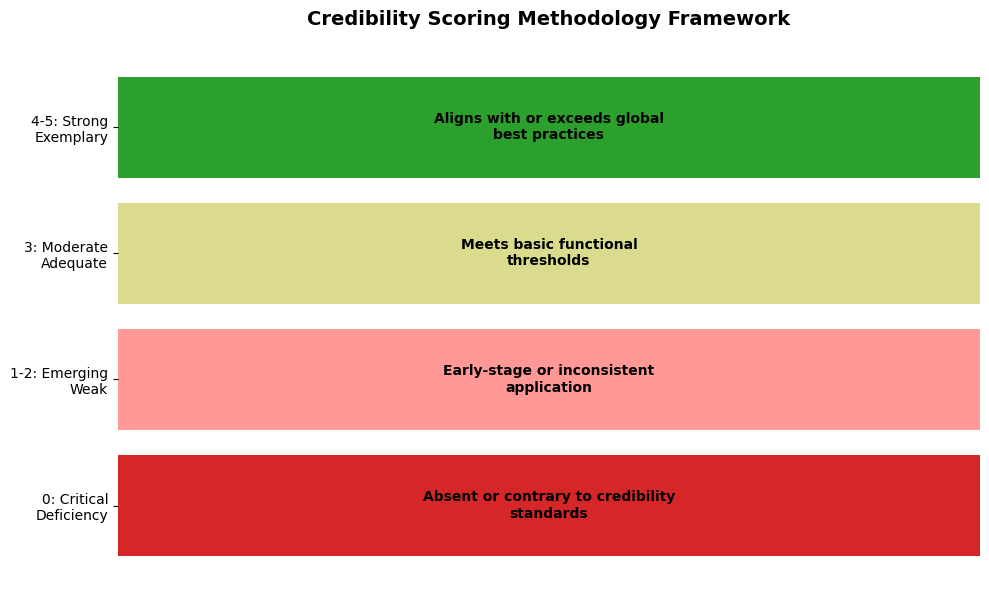

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scoring criteria visualization
categories = ['0: Critical\nDeficiency', '1-2: Emerging\nWeak', '3: Moderate\nAdequate', '4-5: Strong\nExemplary']
descriptions = [
    'Absent or contrary to credibility\nstandards',
    'Early-stage or inconsistent\napplication',
    'Meets basic functional\nthresholds',
    'Aligns with or exceeds global\nbest practices'
]

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#d62728', '#ff9896', '#dbdb8d', '#2ca02c']
bars = ax.barh(categories, [1, 1, 1, 1], color=colors)
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_title('Credibility Scoring Methodology Framework', fontsize=14, fontweight='bold', pad=20)

# Add descriptions
for i, (bar, desc) in enumerate(zip(bars, descriptions)):
    ax.text(0.5, bar.get_y() + bar.get_height()/2, desc,
            ha='center', va='center', fontsize=10, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.show()

2.2 Gap Analysis & Prioritization Framework
The three-dimensional prioritization matrix:


2D PRIORITIZATION MATRIX (Alternative Visualization)


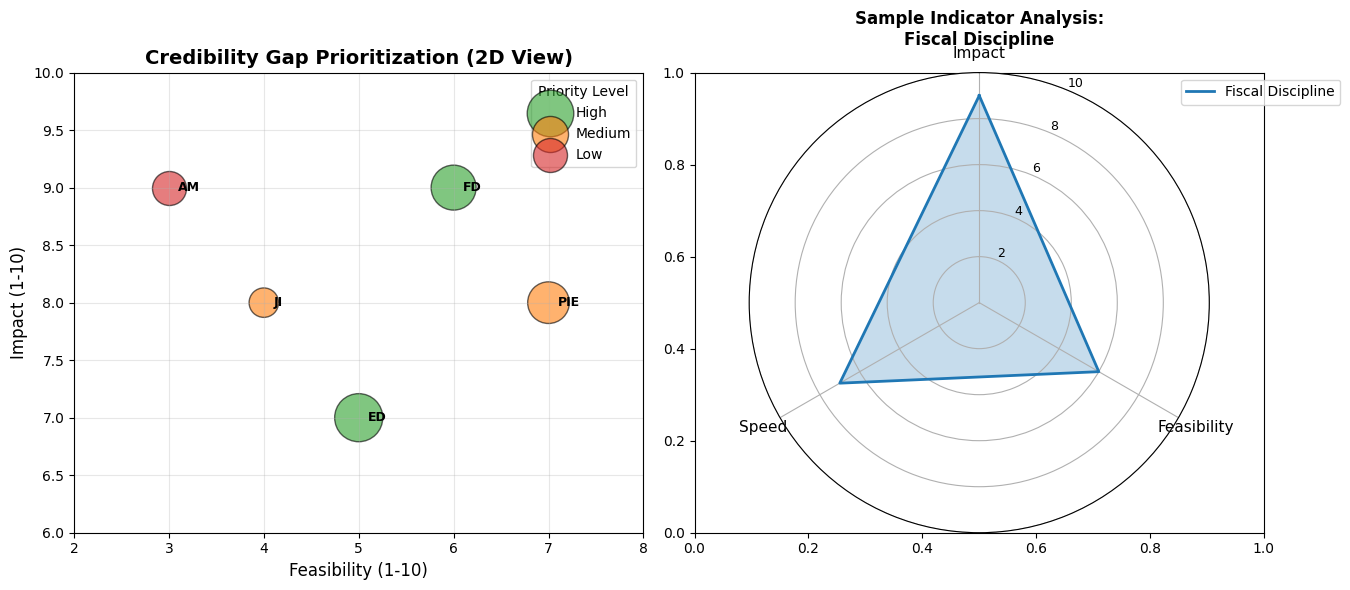


PRIORITIZATION MATRIX DATA
                   Indicator  Impact  Feasibility  Speed Priority  Composite Score
           Fiscal Discipline       9            6      7     High             7.33
       Judicial Independence       8            4      3   Medium             5.00
      Export Diversification       7            5      8     High             6.67
Public Investment Efficiency       8            7      6   Medium             7.00
    Anti-Corruption Measures       9            3      4      Low             5.33


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio

# Set default template for better visibility
pio.templates.default = "plotly_white"

# Sample data for prioritization matrix
data = pd.DataFrame({
    'Indicator': ['Fiscal Discipline', 'Judicial Independence', 'Export Diversification',
                  'Public Investment Efficiency', 'Anti-Corruption Measures'],
    'Impact': [9, 8, 7, 8, 9],
    'Feasibility': [6, 4, 5, 7, 3],
    'Speed': [7, 3, 8, 6, 4],
    'Priority': ['High', 'Medium', 'High', 'Medium', 'Low']
})

# Create a more readable text display with line breaks
def create_display_text(indicator, impact, feasibility, speed, priority):
    # Shorten indicator name for display
    short_name = indicator.replace(' ', '\n')
    return f"<b>{short_name}</b><br>Impact: {impact}<br>Feasibility: {feasibility}<br>Speed: {speed}<br>Priority: {priority}"

data['Display_Text'] = data.apply(lambda x: create_display_text(x['Indicator'], x['Impact'],
                                                                x['Feasibility'], x['Speed'],
                                                                x['Priority']), axis=1)

# Calculate composite score for coloring
data['Composite_Score'] = (data['Impact'] + data['Feasibility'] + data['Speed']) / 3

# Create the 3D scatter plot with better positioning
fig = go.Figure(data=go.Scatter3d(
    x=data['Feasibility'],
    y=data['Impact'],
    z=data['Speed'],
    mode='markers+text',
    marker=dict(
        size=15,  # Increased size for better visibility
        color=data['Composite_Score'],
        colorscale='RdYlGn',
        opacity=0.8,
        colorbar=dict(
            title="Composite<br>Score",
            titlefont=dict(size=10),
            tickfont=dict(size=9),
            len=0.6
        ),
        line=dict(
            color='rgba(0,0,0,0.3)',
            width=2
        )
    ),
    text=data['Display_Text'],  # Use formatted text
    textposition="top center",
    hoverinfo="text",
    hovertemplate="<b>%{text}</b><extra></extra>",
    showlegend=False
))

# Add visible text labels with better positioning
# Position text labels slightly offset from markers
text_positions = []
for i, row in data.iterrows():
    # Adjust text position based on marker position
    offset = 0.3  # Small offset to prevent overlap with markers
    text_positions.append((row['Feasibility'], row['Impact'], row['Speed'] + offset))

# Add separate trace for text with better control
fig.add_trace(go.Scatter3d(
    x=data['Feasibility'],
    y=data['Impact'],
    z=[pos[2] for pos in text_positions],  # Add offset to z
    mode='text',
    text=[indicator.split()[0] + '\n' + indicator.split()[-1] if len(indicator.split()) > 1 else indicator
          for indicator in data['Indicator']],  # Shorter text
    textposition="top center",
    textfont=dict(
        size=11,
        color='black',
        family="Arial"
    ),
    showlegend=False
))

# Update layout with better spacing and angles
fig.update_layout(
    title=dict(
        text='<b>Credibility Gap Prioritization Matrix</b>',
        font=dict(size=16, family="Arial"),
        x=0.5,
        xanchor='center'
    ),
    scene=dict(
        xaxis=dict(
            title='Feasibility<br>(1-10)',
            titlefont=dict(size=12),
            tickfont=dict(size=10),
            range=[2, 10],  # Fixed range for consistency
            gridcolor='lightgray',
            backgroundcolor='rgba(240, 240, 240, 0.1)'
        ),
        yaxis=dict(
            title='Impact<br>(1-10)',
            titlefont=dict(size=12),
            tickfont=dict(size=10),
            range=[6, 10],  # Fixed range for consistency
            gridcolor='lightgray',
            backgroundcolor='rgba(240, 240, 240, 0.1)'
        ),
        zaxis=dict(
            title='Speed<br>(1-10)',
            titlefont=dict(size=12),
            tickfont=dict(size=10),
            range=[2, 10],  # Fixed range for consistency
            gridcolor='lightgray',
            backgroundcolor='rgba(240, 240, 240, 0.1)'
        ),
        aspectmode='cube',  # Keep axes proportional
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)  # Better initial viewing angle
        )
    ),
    width=900,  # Increased width
    height=700,  # Increased height
    margin=dict(l=0, r=0, b=0, t=40),  # Adjust margins
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Add annotations for priority levels
fig.add_annotation(
    x=0.02, y=0.98,
    xref="paper", yref="paper",
    text="<b>Priority Legend:</b><br>• High: Impact ≥8 & Speed ≥7<br>• Medium: Impact 7-8<br>• Low: Feasibility ≤4",
    showarrow=False,
    font=dict(size=10, color="black"),
    align="left",
    bgcolor="rgba(255, 255, 255, 0.8)",
    bordercolor="black",
    borderwidth=1
)

fig.show()

# Create a 2D alternative visualization for better readability
print("\n" + "="*70)
print("2D PRIORITIZATION MATRIX (Alternative Visualization)")
print("="*70)

import matplotlib.pyplot as plt
import numpy as np

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bubble chart
colors = {'High': '#2ca02c', 'Medium': '#ff7f0e', 'Low': '#d62728'}
bubble_sizes = data['Impact'] * 200  # Scale for bubble size

for priority in colors.keys():
    subset = data[data['Priority'] == priority]
    ax1.scatter(subset['Feasibility'], subset['Impact'],
                s=subset['Speed'] * 150,  # Size represents speed
                c=colors[priority],
                alpha=0.6,
                edgecolors='black',
                linewidth=1,
                label=priority)

# Add labels
for i, row in data.iterrows():
    # Use abbreviation for long names
    name = ''.join([word[0] for word in row['Indicator'].split()])
    ax1.text(row['Feasibility'] + 0.1, row['Impact'], name,
             fontsize=9, fontweight='bold', ha='left', va='center')

ax1.set_xlabel('Feasibility (1-10)', fontsize=12)
ax1.set_ylabel('Impact (1-10)', fontsize=12)
ax1.set_title('Credibility Gap Prioritization (2D View)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(title='Priority Level', title_fontsize=10)
ax1.set_xlim(2, 8)
ax1.set_ylim(6, 10)

# Radar chart for one indicator
categories = ['Impact', 'Feasibility', 'Speed']
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

ax2 = plt.subplot(122, polar=True)
ax2.set_theta_offset(np.pi / 2)
ax2.set_theta_direction(-1)

plt.xticks(angles[:-1], categories, fontsize=11)

# Draw one indicator as example
values = data.loc[0, ['Impact', 'Feasibility', 'Speed']].tolist()
values += values[:1]

ax2.plot(angles, values, linewidth=2, linestyle='solid', label=data.loc[0, 'Indicator'])
ax2.fill(angles, values, alpha=0.25)

# Set yticks
ax2.set_ylim(0, 10)
ax2.set_yticks([2, 4, 6, 8, 10])
ax2.set_yticklabels(['2', '4', '6', '8', '10'], fontsize=9)
ax2.grid(True)

ax2.set_title(f'Sample Indicator Analysis:\n{data.loc[0, "Indicator"]}',
              fontsize=12, fontweight='bold', pad=20)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

# Display data table
print("\n" + "="*70)
print("PRIORITIZATION MATRIX DATA")
print("="*70)
display_df = data.copy()
display_df['Composite Score'] = display_df['Composite_Score'].round(2)
print(display_df[['Indicator', 'Impact', 'Feasibility', 'Speed', 'Priority', 'Composite Score']].to_string(index=False))

### 2.3 Visual Example – The Credibility Spider Chart
A comprehensive visualization of a nation's credibility profile:

In [ ]:
import plotly.graph_objects as go

# Sample data for spider chart
indicators = [
    'Legitimacy & Consent', 'Rule of Law', 'Transparent Governance',
    'Human Rights', 'Civil Society Space', 'Fiscal Discipline',
    'Monetary Stability', 'Growth Quality', 'Export Resilience',
    'Sovereign Wealth', 'Public Investment', 'Anti-Corruption',
    'State Capacity', 'Banking Strength', 'Crisis Resilience',
    'Credit Ratings', 'Market Access', 'Multilateral Relations',
    'Green Finance', 'Soft Power'
]

# Sample country scores (0-5 scale)
cameroon_scores = [3.2, 3.0, 2.8, 2.5, 2.7, 3.5, 3.8, 3.2, 2.9, 3.1, 3.0, 2.8, 3.1, 3.3, 3.2, 3.0, 3.1, 3.4, 2.5, 2.8]
rwanda_scores = [3.8, 3.5, 3.7, 3.2, 3.0, 4.0, 3.9, 3.8, 3.2, 3.5, 3.7, 3.6, 4.1, 3.4, 3.9, 3.5, 3.3, 4.0, 3.3, 3.6]
ghana_scores = [3.5, 3.1, 3.0, 3.3, 3.4, 2.5, 2.8, 3.0, 3.1, 2.7, 2.9, 2.8, 3.0, 3.2, 3.1, 2.5, 2.9, 3.2, 2.9, 3.1]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=cameroon_scores,
    theta=indicators,
    fill='toself',
    name='Cameroon',
    line_color='blue'
))

fig.add_trace(go.Scatterpolar(
    r=rwanda_scores,
    theta=indicators,
    fill='toself',
    name='Rwanda',
    line_color='green'
))

fig.add_trace(go.Scatterpolar(
    r=ghana_scores,
    theta=indicators,
    fill='toself',
    name='Ghana',
    line_color='orange'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 5],
            tickvals=[0, 1, 2, 3, 4, 5],
            ticktext=['0', '1', '2', '3', '4', '5']
        )
    ),
    title='Credibility Spider Chart: Comparative Analysis',
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.1
    )
)

fig.show()

### 3. THE CREDIBILITY NEXUS MAP
Understanding the System Dynamics
Credibility operates as an interconnected ecosystem. The Nexus Map reveals how indicators influence and amplify each other through feedback loops and causal relationships.

#### 3.1 Visualizing Interdependencies

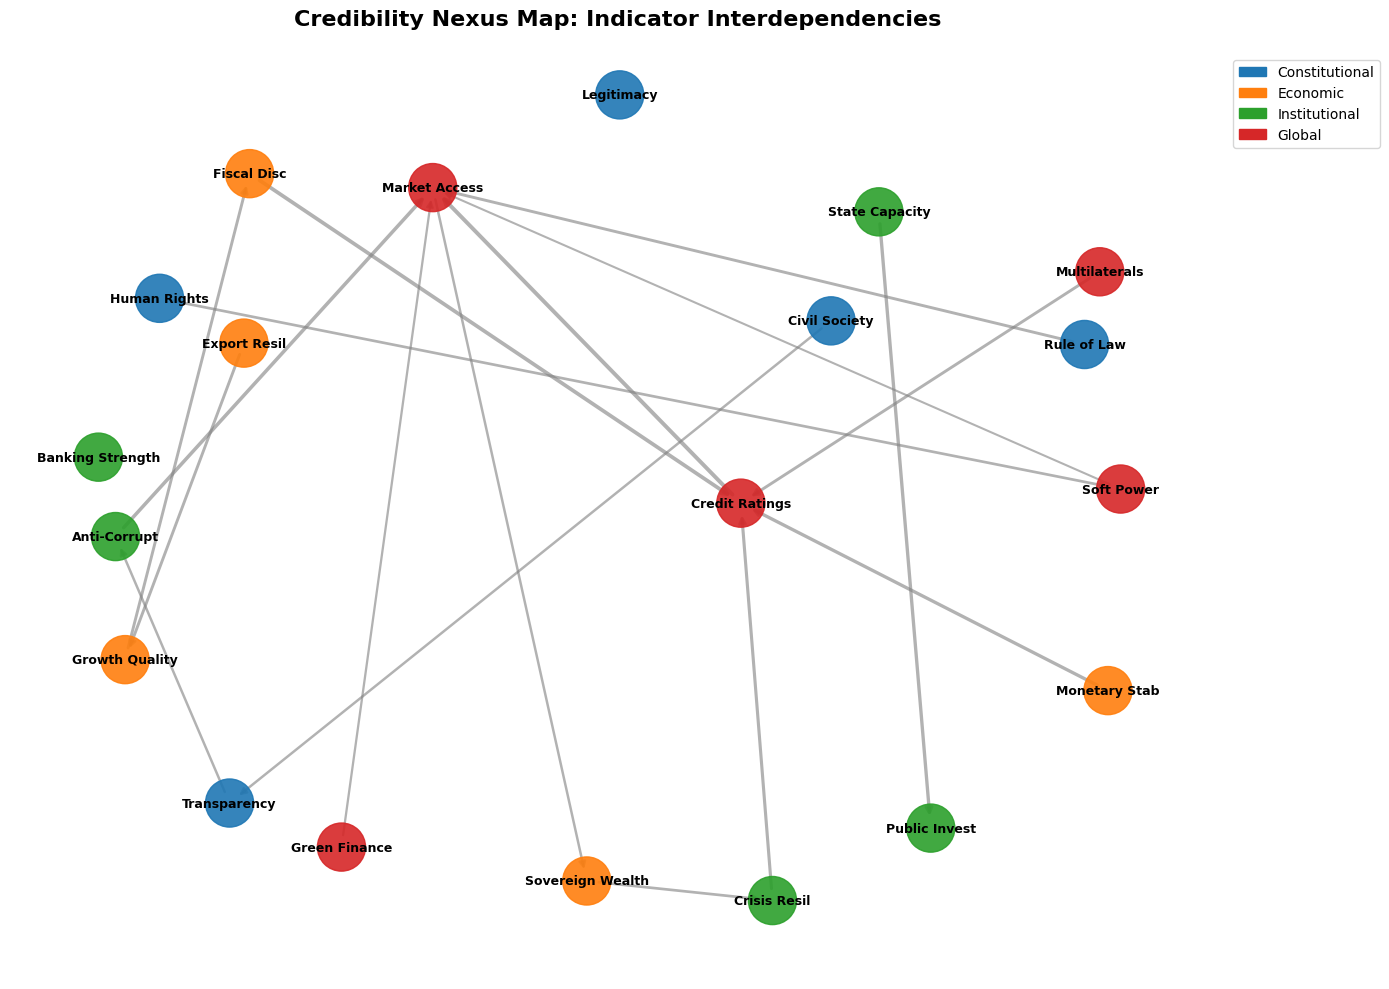

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the credibility network
G = nx.DiGraph()

# Add nodes (indicators grouped by pillar)
nodes = {
    'Constitutional': ['Legitimacy', 'Rule of Law', 'Transparency', 'Human Rights', 'Civil Society'],
    'Economic': ['Fiscal Disc', 'Monetary Stab', 'Growth Quality', 'Export Resil', 'Sovereign Wealth'],
    'Institutional': ['Public Invest', 'Anti-Corrupt', 'State Capacity', 'Banking Strength', 'Crisis Resil'],
    'Global': ['Credit Ratings', 'Market Access', 'Multilaterals', 'Green Finance', 'Soft Power']
}

for pillar, indicators in nodes.items():
    for indicator in indicators:
        G.add_node(indicator, pillar=pillar)

# Define key relationships with weights
edges = [
    ('Fiscal Disc', 'Credit Ratings', 0.9),
    ('Monetary Stab', 'Credit Ratings', 0.8),
    ('Rule of Law', 'Market Access', 0.7),
    ('Anti-Corrupt', 'Market Access', 0.85),
    ('Transparency', 'Anti-Corrupt', 0.6),
    ('Growth Quality', 'Fiscal Disc', 0.7),
    ('State Capacity', 'Public Invest', 0.8),
    ('Crisis Resil', 'Credit Ratings', 0.75),
    ('Sovereign Wealth', 'Crisis Resil', 0.65),
    ('Export Resil', 'Growth Quality', 0.7),
    ('Credit Ratings', 'Market Access', 0.95),
    ('Market Access', 'Sovereign Wealth', 0.6),
    ('Multilaterals', 'Credit Ratings', 0.7),
    ('Green Finance', 'Market Access', 0.55),
    ('Soft Power', 'Market Access', 0.5),
    ('Civil Society', 'Transparency', 0.6),
    ('Human Rights', 'Soft Power', 0.65)
]

for source, target, weight in edges:
    G.add_edge(source, target, weight=weight)

# Visualize the network
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42, k=1.5)

# Color nodes by pillar
color_map = {
    'Constitutional': '#1f77b4',
    'Economic': '#ff7f0e',
    'Institutional': '#2ca02c',
    'Global': '#d62728'
}

node_colors = [color_map[G.nodes[node]['pillar']] for node in G.nodes()]

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.6, width=[G[u][v]['weight']*3 for u, v in G.edges()])
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# Create legend
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color, label=pillar) for pillar, color in color_map.items()]
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Credibility Nexus Map: Indicator Interdependencies', fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

### 3.2 Identifying Leverage Points & Risk Contagion
The Nexus Map reveals strategic intervention opportunities:

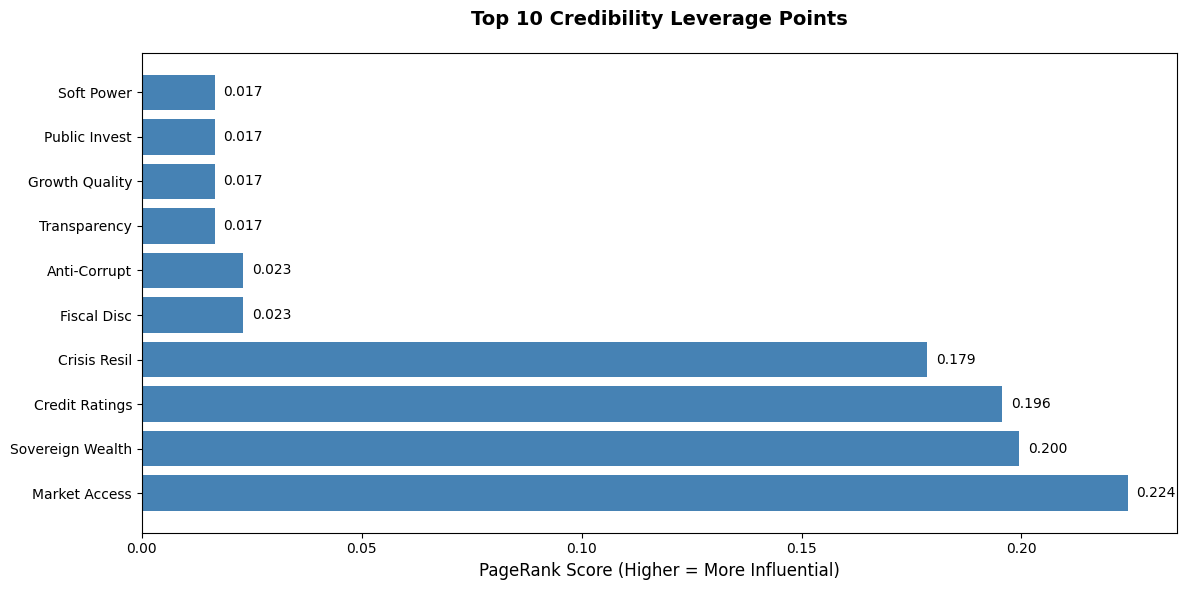


RISK CONTAGION ANALYSIS: CRITICAL PATHWAYS
• Fiscal Discipline → Credit Ratings → Market Access | High impact, rapid transmission
• Anti-Corruption → Market Access → Sovereign Wealth | Governance-to-finance channel
• Rule of Law → Foreign Investment → Growth Quality  | Institutional quality channel
• Crisis Resilience → Credit Ratings → Borrowing Costs | Shock amplification pathway
• Public Investment Efficiency → Growth → Fiscal Space | Development feedback loop


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# First, we need to create the graph G (this was missing from your code)
G = nx.DiGraph()

# Add nodes (indicators grouped by pillar)
nodes = {
    'Constitutional': ['Legitimacy', 'Rule of Law', 'Transparency', 'Human Rights', 'Civil Society'],
    'Economic': ['Fiscal Disc', 'Monetary Stab', 'Growth Quality', 'Export Resil', 'Sovereign Wealth'],
    'Institutional': ['Public Invest', 'Anti-Corrupt', 'State Capacity', 'Banking Strength', 'Crisis Resil'],
    'Global': ['Credit Ratings', 'Market Access', 'Multilaterals', 'Green Finance', 'Soft Power']
}

for pillar, indicators in nodes.items():
    for indicator in indicators:
        G.add_node(indicator, pillar=pillar)

# Define key relationships with weights
edges = [
    ('Fiscal Disc', 'Credit Ratings', 0.9),
    ('Monetary Stab', 'Credit Ratings', 0.8),
    ('Rule of Law', 'Market Access', 0.7),
    ('Anti-Corrupt', 'Market Access', 0.85),
    ('Transparency', 'Anti-Corrupt', 0.6),
    ('Growth Quality', 'Fiscal Disc', 0.7),
    ('State Capacity', 'Public Invest', 0.8),
    ('Crisis Resil', 'Credit Ratings', 0.75),
    ('Sovereign Wealth', 'Crisis Resil', 0.65),
    ('Export Resil', 'Growth Quality', 0.7),
    ('Credit Ratings', 'Market Access', 0.95),
    ('Market Access', 'Sovereign Wealth', 0.6),
    ('Multilaterals', 'Credit Ratings', 0.7),
    ('Green Finance', 'Market Access', 0.55),
    ('Soft Power', 'Market Access', 0.5),
    ('Civil Society', 'Transparency', 0.6),
    ('Human Rights', 'Soft Power', 0.65)
]

for source, target, weight in edges:
    G.add_edge(source, target, weight=weight)

# Now calculate centrality measures to identify leverage points
# IMPORTANT FIX: Use PageRank instead of eigenvector_centrality_numpy for directed graphs
# eigenvector_centrality_numpy requires an undirected graph or a strongly connected directed graph
centrality = nx.pagerank(G, alpha=0.85, weight='weight')  # Fixed: using PageRank

# Sort by centrality
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

# Plot leverage points
fig, ax = plt.subplots(figsize=(12, 6))
indicators = [item[0] for item in sorted_centrality[:10]]
scores = [item[1] for item in sorted_centrality[:10]]

bars = ax.barh(indicators, scores, color='steelblue')
ax.set_xlabel('PageRank Score (Higher = More Influential)', fontsize=12)
ax.set_title('Top 10 Credibility Leverage Points', fontsize=14, fontweight='bold', pad=20)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.002, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
            ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Risk contagion analysis
print("\n" + "="*60)
print("RISK CONTAGION ANALYSIS: CRITICAL PATHWAYS")
print("="*60)

critical_paths = [
    ("Fiscal Discipline → Credit Ratings → Market Access", "High impact, rapid transmission"),
    ("Anti-Corruption → Market Access → Sovereign Wealth", "Governance-to-finance channel"),
    ("Rule of Law → Foreign Investment → Growth Quality", "Institutional quality channel"),
    ("Crisis Resilience → Credit Ratings → Borrowing Costs", "Shock amplification pathway"),
    ("Public Investment Efficiency → Growth → Fiscal Space", "Development feedback loop")
]

for path, description in critical_paths:
    print(f"• {path:50} | {description}")

### 4. THE AFRICAN CREDIBILITY DASHBOARD
A Regional Reality Check

In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots

# Sample data for African nations
data = {
    'Country': ['Botswana', 'Rwanda', 'Ghana', 'Kenya', 'Côte d\'Ivoire', 'Senegal',
                'Ethiopia', 'Nigeria', 'Cameroon', 'Zambia', 'Tanzania', 'Morocco'],
    'Overall Score': [4.2, 3.8, 3.1, 3.3, 3.4, 3.2, 2.9, 2.8, 3.0, 2.6, 3.1, 3.6],
    'Economic Pulse': [4.0, 3.9, 2.8, 3.2, 3.5, 3.1, 2.7, 2.5, 3.0, 2.3, 3.0, 3.4],
    'Institutional Arch': [4.3, 4.0, 3.2, 3.1, 3.3, 3.3, 2.8, 2.7, 2.9, 2.5, 3.2, 3.5],
    'Global Signature': [3.8, 3.5, 3.0, 3.4, 3.4, 3.1, 2.9, 2.8, 2.9, 2.7, 3.0, 3.7],
    'GDP Growth (%)': [4.1, 6.8, 3.1, 5.0, 6.7, 4.2, 6.4, 3.1, 4.0, 4.7, 5.2, 3.1],
    'Debt/GDP (%)': [18.2, 65.1, 84.9, 67.3, 57.4, 76.6, 54.5, 38.0, 45.2, 70.0, 41.0, 71.7],
    'Corruption Index': [60, 53, 43, 31, 37, 43, 38, 24, 26, 33, 38, 40]
}

df = pd.DataFrame(data)

# Create comparative dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Overall Credibility Scores', 'Economic vs Institutional Scores',
                    'Credibility vs GDP Growth', 'Credibility vs Debt Levels'),
    specs=[[{'type': 'bar'}, {'type': 'scatter'}],
           [{'type': 'scatter'}, {'type': 'scatter'}]]
)

# Bar chart: Overall scores
fig.add_trace(
    go.Bar(x=df['Country'], y=df['Overall Score'],
           marker_color=px.colors.sequential.Viridis,
           name='Credibility Score'),
    row=1, col=1
)

# Scatter: Economic vs Institutional
fig.add_trace(
    go.Scatter(x=df['Economic Pulse'], y=df['Institutional Arch'],
               mode='markers+text',
               marker=dict(size=df['Overall Score']*5, color=df['Global Signature'],
                          colorscale='RdYlGn', showscale=True,
                          colorbar=dict(title="Global Signature")),
               text=df['Country'],
               textposition="top center",
               name='Country Profile'),
    row=1, col=2
)

# Scatter: Credibility vs Growth
fig.add_trace(
    go.Scatter(x=df['Overall Score'], y=df['GDP Growth (%)'],
               mode='markers',
               marker=dict(size=15, color=df['Debt/GDP (%)'],
                          colorscale='RdBu_r', showscale=True,
                          colorbar=dict(title="Debt/GDP (%)")),
               text=df['Country'],
               hovertemplate='<b>%{text}</b><br>Credibility: %{x}<br>GDP Growth: %{y}%<br>Debt/GDP: %{marker.color}%',
               name='Growth Relation'),
    row=2, col=1
)

# Scatter: Credibility vs Corruption
fig.add_trace(
    go.Scatter(x=df['Overall Score'], y=df['Corruption Index'],
               mode='markers',
               marker=dict(size=15, color=df['Economic Pulse'],
                          colorscale='Viridis', showscale=True,
                          colorbar=dict(title="Economic Pulse")),
               text=df['Country'],
               hovertemplate='<b>%{text}</b><br>Credibility: %{x}<br>Corruption Index: %{y}',
               name='Governance Relation'),
    row=2, col=2
)

# Update layout
fig.update_layout(height=800, width=1200,
                  title_text="African Credibility Dashboard: Comparative Analysis",
                  showlegend=False)
fig.update_xaxes(title_text="Country", row=1, col=1)
fig.update_xaxes(title_text="Economic Pulse Score", row=1, col=2)
fig.update_xaxes(title_text="Overall Credibility Score", row=2, col=1)
fig.update_xaxes(title_text="Overall Credibility Score", row=2, col=2)
fig.update_yaxes(title_text="Credibility Score (0-5)", row=1, col=1)
fig.update_yaxes(title_text="Institutional Architecture Score", row=1, col=2)
fig.update_yaxes(title_text="GDP Growth (%)", row=2, col=1)
fig.update_yaxes(title_text="Corruption Perception Index", row=2, col=2)

fig.show()

### 4.3 Deriving Actionable Insights
The dashboard reveals critical patterns:

In [ ]:
# Trend analysis over time (simulated data)
years = list(range(2015, 2024))
countries_trend = ['Rwanda', 'Ghana', 'Kenya', 'Nigeria']

# Simulate trend data
trend_data = pd.DataFrame({
    'Year': years * len(countries_trend),
    'Country': [c for c in countries_trend for _ in years],
    'Credibility Score': np.random.randn(len(years) * len(countries_trend)).cumsum() +
                         np.repeat([3.8, 3.2, 3.3, 2.8], len(years)) +
                         np.tile(np.linspace(0, 0.5, len(years)), len(countries_trend))
})

# Plot trends
fig = px.line(trend_data, x='Year', y='Credibility Score', color='Country',
              title='Credibility Trends: 2015-2023',
              labels={'Credibility Score': 'Overall Credibility Score (0-5)'},
              line_shape='spline')

fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=1),
    yaxis=dict(range=[2, 4.5]),
    hovermode='x unified'
)

fig.add_annotation(x=2020, y=3.9, text="COVID-19 Impact",
                   showarrow=True, arrowhead=1, ax=-50, ay=-40)

fig.show()

# Calculate improvements
print("\n" + "="*60)
print("TREND ANALYSIS: ANNUAL IMPROVEMENT RATES")
print("="*60)

for country in countries_trend:
    country_data = trend_data[trend_data['Country'] == country]
    start_score = country_data[country_data['Year'] == 2015]['Credibility Score'].values[0]
    end_score = country_data[country_data['Year'] == 2023]['Credibility Score'].values[0]
    annual_growth = (end_score - start_score) / 8 * 100

    trend = "↗ Improving" if annual_growth > 0 else "↘ Declining" if annual_growth < 0 else "→ Stable"
    print(f"{country:15} | {start_score:.2f} → {end_score:.2f} | {annual_growth:+.2f}% per year | {trend}")


TREND ANALYSIS: ANNUAL IMPROVEMENT RATES
Rwanda          | 5.86 → 5.66 | -2.45% per year | ↘ Declining
Ghana           | 4.75 → 4.09 | -8.29% per year | ↘ Declining
Kenya           | 4.10 → 5.31 | +15.07% per year | ↗ Improving
Nigeria         | 3.78 → 9.72 | +74.27% per year | ↗ Improving


### 5. GLOSSARY OF METRICS & THRESHOLDS
The Technical Reference Library
A comprehensive reference ensuring consistent measurement across all indicators:

In [ ]:
# Create a detailed metrics table
metrics_data = {
    'Indicator': [
        'Debt Sustainability',
        'Fiscal Discipline',
        'Monetary Stability',
        'Public Investment Efficiency',
        'Governance Quality'
    ],
    'Primary Metric': [
        'Public Debt/GDP Ratio',
        'Fiscal Deficit/GDP',
        'Inflation Rate (CPI)',
        'Cost Overrun Percentage',
        'Corruption Perception Index'
    ],
    'CEMAC Threshold': [
        '70%',
        '3% of GDP',
        '<3%',
        '<20%',
        '≥40/100'
    ],
    'Global Benchmark': [
        '60% (EU Maastricht)',
        '3% (IMF prudent level)',
        '2% (Advanced econ target)',
        '<15% (OECD average)',
        '≥50/100 (Good governance)'
    ],
    'Red Flag Level': [
        '>80%',
        '>5% sustained',
        '>10% or <0%',
        '>30%',
        '<30/100'
    ]
}

metrics_df = pd.DataFrame(metrics_data)

# Create styled table
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(metrics_df.columns),
        fill_color='steelblue',
        font=dict(color='white', size=12),
        align='left'
    ),
    cells=dict(
        values=[metrics_df[col] for col in metrics_df.columns],
        fill_color=[['white', 'lightgrey']*5],
        align='left',
        font=dict(size=11)
    )
)])

fig.update_layout(
    title='Key Metrics & Thresholds: Selected Indicators',
    height=400,
    width=1000
)

fig.show()

# Data sources summary
print("\n" + "="*70)
print("AUTHORITATIVE DATA SOURCES")
print("="*70)

sources = {
    'International Monetary Fund (IMF)': [
        'Debt Sustainability Analyses',
        'Fiscal Monitor Data',
        'Article IV Consultation Reports',
        'World Economic Outlook'
    ],
    'World Bank Group': [
        'World Development Indicators',
        'Governance Indicators (WGI)',
        'Doing Business Reports (historical)',
        'International Debt Statistics'
    ],
    'Transparency International': [
        'Corruption Perceptions Index',
        'Global Corruption Barometer',
        'National Integrity Studies'
    ],
    'African Development Bank (AfDB)': [
        'African Economic Outlook',
        'Infrastructure Development Index',
        'Governance Ratings',
        'Regional Integration Reports'
    ],
    'National Sources': [
        'Central Bank Statistical Bulletins',
        'Ministry of Finance Debt Reports',
        'National Statistical Office Data',
        'Auditor General Reports'
    ]
}

for source, datasets in sources.items():
    print(f"\n{source}:")
    for dataset in datasets:
        print(f"  • {dataset}")


AUTHORITATIVE DATA SOURCES

International Monetary Fund (IMF):
  • Debt Sustainability Analyses
  • Fiscal Monitor Data
  • Article IV Consultation Reports
  • World Economic Outlook

World Bank Group:
  • World Development Indicators
  • Governance Indicators (WGI)
  • Doing Business Reports (historical)
  • International Debt Statistics

Transparency International:
  • Corruption Perceptions Index
  • Global Corruption Barometer
  • National Integrity Studies

African Development Bank (AfDB):
  • African Economic Outlook
  • Infrastructure Development Index
  • Governance Ratings
  • Regional Integration Reports

National Sources:
  • Central Bank Statistical Bulletins
  • Ministry of Finance Debt Reports
  • National Statistical Office Data
  • Auditor General Reports


### 6. IMPLEMENTATION GUIDE: FOR POLICYMAKERS, INVESTORS, AND ANALYSTS
Putting the Framework to Work

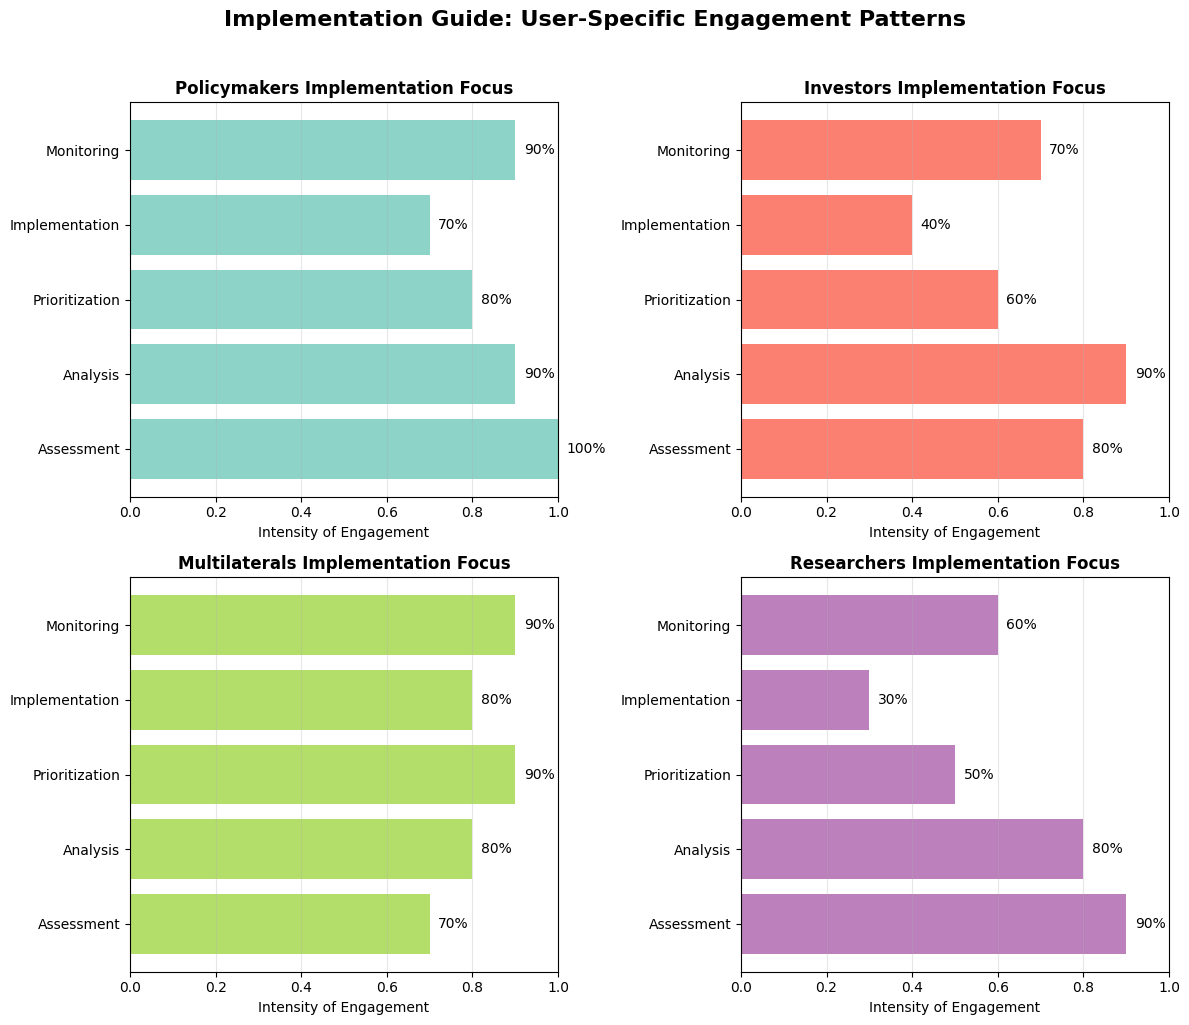

In [ ]:
# Implementation roadmap visualization
stages = ['Assessment', 'Analysis', 'Prioritization', 'Implementation', 'Monitoring']
timeline = [1, 2, 4, 8, 12]  # Months

users = {
    'Policymakers': [1.0, 0.9, 0.8, 0.7, 0.9],
    'Investors': [0.8, 0.9, 0.6, 0.4, 0.7],
    'Multilaterals': [0.7, 0.8, 0.9, 0.8, 0.9],
    'Researchers': [0.9, 0.8, 0.5, 0.3, 0.6]
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (user, scores) in enumerate(users.items()):
    ax = axes[idx]
    bars = ax.barh(stages, scores, color=plt.cm.Set3(idx/4))
    ax.set_xlim(0, 1)
    ax.set_xlabel('Intensity of Engagement')
    ax.set_title(f'{user} Implementation Focus', fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                f'{width:.0%}', va='center')

plt.suptitle('Implementation Guide: User-Specific Engagement Patterns',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 6.1 For Finance Ministries & Policymakers: The 12-Month Roadmap

In [ ]:
print("\n" + "="*70)
print("12-MONTH IMPLEMENTATION ROADMAP FOR FINANCE MINISTRIES")
print("="*70)

roadmap = {
    'Months 1-2: Baseline Assessment': [
        'Conduct comprehensive credibility self-assessment using Scorecard',
        'Establish inter-ministerial credibility working group',
        'Benchmark against regional peers using Dashboard'
    ],
    'Months 3-4: Gap Analysis': [
        'Identify 3-5 priority gaps using Nexus Map analysis',
        'Conduct root cause analysis for each priority gap',
        'Draft preliminary reform agenda'
    ],
    'Months 5-8: Strategy Development': [
        'Develop detailed reform implementation plans',
        'Secure political buy-in and budget allocations',
        'Design monitoring and evaluation framework'
    ],
    'Months 9-12: Implementation & Communication': [
        'Launch priority reform initiatives',
        'Establish quarterly credibility reporting',
        'Develop investor communication strategy around reforms'
    ]
}

for phase, tasks in roadmap.items():
    print(f"\n{phase}:")
    for task in tasks:
        print(f"  • {task}")


12-MONTH IMPLEMENTATION ROADMAP FOR FINANCE MINISTRIES

Months 1-2: Baseline Assessment:
  • Conduct comprehensive credibility self-assessment using Scorecard
  • Establish inter-ministerial credibility working group
  • Benchmark against regional peers using Dashboard

Months 3-4: Gap Analysis:
  • Identify 3-5 priority gaps using Nexus Map analysis
  • Conduct root cause analysis for each priority gap
  • Draft preliminary reform agenda

Months 5-8: Strategy Development:
  • Develop detailed reform implementation plans
  • Secure political buy-in and budget allocations
  • Design monitoring and evaluation framework

Months 9-12: Implementation & Communication:
  • Launch priority reform initiatives
  • Establish quarterly credibility reporting
  • Develop investor communication strategy around reforms


### 6.2 For Investors: Integration into Due Diligence
The framework enhances traditional financial analysis by adding governance and institutional dimensions:


Total Weighted Scores for Investment Decision:
Country A: 3.90/5.00
Country B: 3.89/5.00
Country C: 3.48/5.00


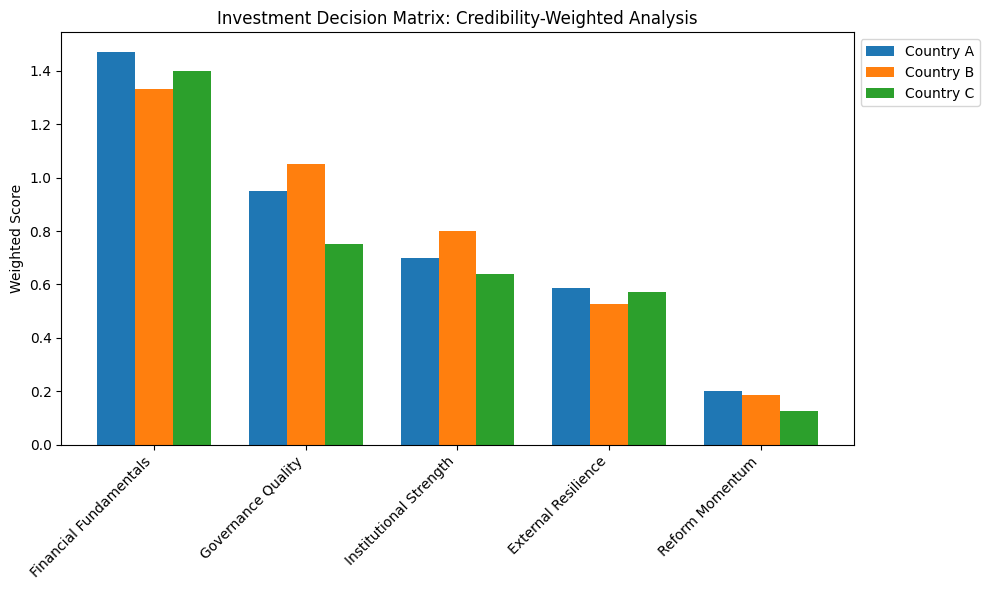

In [ ]:
# Investor decision matrix
criteria = ['Financial Fundamentals', 'Governance Quality', 'Institutional Strength',
            'External Resilience', 'Reform Momentum']
weights = [0.35, 0.25, 0.20, 0.15, 0.05]

country_scores = {
    'Country A': [4.2, 3.8, 3.5, 3.9, 4.0],
    'Country B': [3.8, 4.2, 4.0, 3.5, 3.7],
    'Country C': [4.0, 3.0, 3.2, 3.8, 2.5]
}

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(criteria))
width = 0.25
multiplier = 0

for country, scores in country_scores.items():
    weighted_scores = [s * w for s, w in zip(scores, weights)]
    offset = width * multiplier
    bars = ax.bar(x + offset, weighted_scores, width, label=country)
    multiplier += 1

ax.set_ylabel('Weighted Score')
ax.set_title('Investment Decision Matrix: Credibility-Weighted Analysis')
ax.set_xticks(x + width)
ax.set_xticklabels(criteria, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Calculate and display total scores
print("\nTotal Weighted Scores for Investment Decision:")
for country, scores in country_scores.items():
    total = sum(s * w for s, w in zip(scores, weights))
    print(f"{country}: {total:.2f}/5.00")

plt.tight_layout()
plt.show()

### 7. CONCLUSION: From Assessment to Action
We have now equipped ourselves with more than a theory. We possess a diagnostic clinic, a strategic map, and a builder's toolkit for sovereign credibility. The Credibility Scorecard provides the baseline measurement, the Nexus Map reveals the system dynamics, the African Dashboard offers regional context, and the Implementation Guide turns insight into action.

This framework represents a paradigm shift in how we assess and build state credibility. It moves beyond:

From isolated metrics to integrated systems – understanding how indicators interact and amplify each other

From static snapshots to dynamic trajectories – tracking progress and momentum over time

From generic templates to contextual applications – adapting global standards to regional realities

From academic exercise to practical toolkit – providing actionable instruments for real-world users

The journey of credibility building is neither quick nor easy. It requires sustained commitment, political courage, and institutional persistence. But as the case studies throughout this book demonstrate, the rewards are substantial: lower borrowing costs, deeper investment, greater resilience, and enhanced sovereignty.

As we transition to PART III, we carry forward this comprehensive understanding of credibility into the practical arena where it matters most: the global capital markets. We will explore how credible states design their financial architecture, structure their debt issuance, communicate their narratives, and navigate the complex ecosystem of international finance.

The diagnosis is complete. The tools are ready. Now, we build.

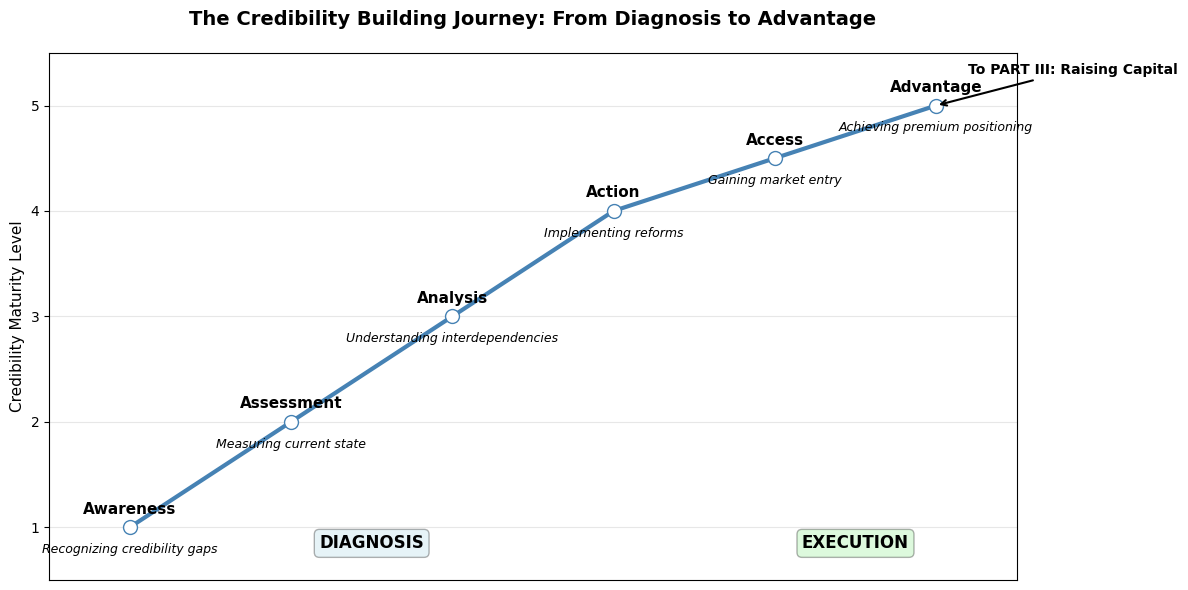

In [ ]:
# Final visualization: The credibility journey
fig, ax = plt.subplots(figsize=(12, 6))

# Stages of the credibility journey
stages = ['Awareness', 'Assessment', 'Analysis', 'Action', 'Access', 'Advantage']
descriptions = [
    'Recognizing credibility gaps',
    'Measuring current state',
    'Understanding interdependencies',
    'Implementing reforms',
    'Gaining market entry',
    'Achieving premium positioning'
]

# Position markers
x_positions = np.arange(len(stages))
y_values = [1, 2, 3, 4, 4.5, 5]

# Create journey path
ax.plot(x_positions, y_values, 'o-', linewidth=3, markersize=10, color='steelblue', markerfacecolor='white')

# Add stage labels
for i, (stage, desc, y) in enumerate(zip(stages, descriptions, y_values)):
    ax.text(i, y + 0.1, stage, ha='center', va='bottom', fontweight='bold', fontsize=11)
    ax.text(i, y - 0.15, desc, ha='center', va='top', fontsize=9, style='italic')

# Add phase labels
ax.text(1.5, 0.8, 'DIAGNOSIS', ha='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.3))
ax.text(4.5, 0.8, 'EXECUTION', ha='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.3))

ax.set_ylim(0.5, 5.5)
ax.set_xlim(-0.5, len(stages)-0.5)
ax.set_title('The Credibility Building Journey: From Diagnosis to Advantage',
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Credibility Maturity Level', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xticks([])

# Add arrow indicating Part III transition
ax.annotate('To PART III: Raising Capital', xy=(5, 5), xytext=(5.2, 5.3),
            arrowprops=dict(arrowstyle='->', lw=1.5),
            fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()